In [41]:
import pandas as pd
from exp_data_analysis import ExpDataAnalysis
from data_clean import CleanData

In [36]:
%matplotlib inline

In [21]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

In [42]:
clean = CleanData(df)

In [1]:
# clean.formatResolution()
# clean.formatScreenSize()
# # clean.clean_numeric_column('Ram', 'GB')
# clean.clean_numeric_column('Weight', 'kg')
clean.df

NameError: name 'clean' is not defined

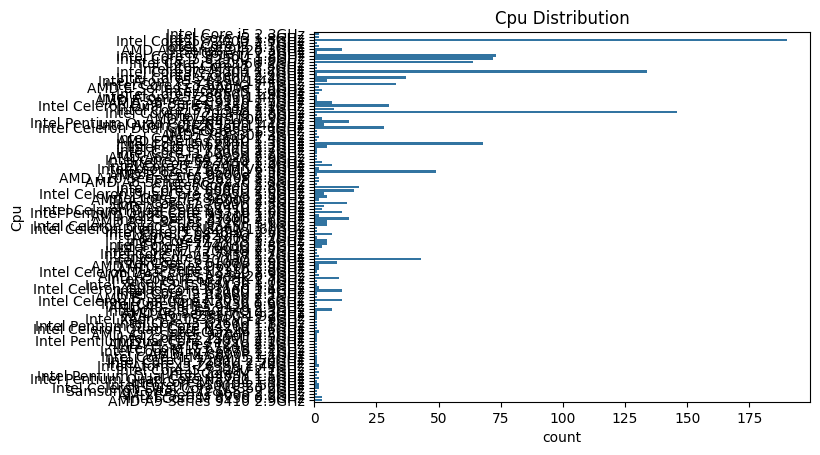

<Figure size 1200x2000 with 0 Axes>

In [38]:
expData = ExpDataAnalysis(df)
expData.getMissingValues()
# expData.getBrandDistribution()
# expData.getPriceDistribution()
# expData.getScreenSizeDistribution()
expData.getCpuDistribution()
# expData.getRamDistribution()
# expData.getCompanyPriceRelation()
# expData.getScreenSizePriceRelation()
# expData.getCpuPriceRelation()
# expData.getRamPriceRelation()
# expData.getCorrelationMatrix()
# expData.getStatInsights()